In [97]:
import scipy.io
import numpy as np
import operator as op

In [98]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt # matplotlib
matplotlib.rcParams['figure.figsize'] = list(map(lambda x: 2*x, matplotlib.rcParams['figure.figsize']))
matplotlib.style.use('ggplot')

In [99]:
data_2 = scipy.io.loadmat('../../data2.mat')
data_1 = scipy.io.loadmat('../../data1.mat')
data_1.keys()

dict_keys(['__header__', '__version__', '__globals__', 'bin', 'data1_Xian', 'label1', 'spotColumn1_Xian', 'spotRow1_Xian'])

In [100]:
coorX_1 = data_1['spotRow1_Xian'][0]
coorY_1 = data_1['spotColumn1_Xian'][0]
mz_values_1 = data_1['bin'].T
mz_values_1

array([[  1996.95878277],
       [  1998.24538575],
       [  1999.53198872],
       ..., 
       [ 20005.54064941],
       [ 20006.82725239],
       [ 20008.11385537]])

In [101]:
coorY_2 = data_2['spotColumn2_Xian'][0]
coorX_2 = data_2['spotRow2_Xian'][0]
mz_values_2 = data_2['bin'].T

In [102]:
coorX_1 -= coorX_1.min()
coorY_1 -= coorY_1.min()

nrows_1 = coorX_1.max() + 1
ncols_1 = coorY_1.max() + 1
print('nrows %d, ncols %d' % (nrows_1, ncols_1))

nrows 129, ncols 154


In [103]:
coorX_2 -= coorX_2.min()
coorY_2 -= coorY_2.min()

nrows_2 = coorX_2.max() + 1
ncols_2 = coorY_2.max() + 1
print('nrows %d, ncols %d' % (nrows_2, ncols_2))

nrows 98, ncols 138


In [104]:
mask_1 = np.zeros((nrows_1, ncols_1))
for r, c in zip(coorX_1, coorY_1):
    mask_1[r,c] = 1

#plt.imshow(mask_1, cmap='binary')

In [105]:
mask_2 = np.zeros((nrows_2, ncols_2))
for r, c in zip(coorX_2, coorY_2):
    mask_2[r,c] = 1

#plt.imshow(mask_2, cmap='binary')

In [106]:
data_cube_1 = np.zeros((nrows_1, ncols_1, mz_values_1.shape[0]))
data_cube_1[coorX_1, coorY_1, :] = data_1["data1_Xian"]

data_matrix_1 = data_1['data1_Xian']
data_matrix_1.shape

(9577, 14000)

In [107]:
data_cube_2 = np.zeros((nrows_2, ncols_2, mz_values_2.shape[0]))
data_cube_2[coorX_2, coorY_2, :] = data_2["data2_Xian"]

data_matrix_2 = data_2['data2_Xian']
data_matrix_2.shape

(6869, 14000)

In [108]:
row2grid_1 = {r: (coorX_1[r], coorY_1[r]) for r in range(data_matrix_1.shape[0])}
grid2row_1 = {(coorX_1[r], coorY_1[r]): r for r in range(data_matrix_1.shape[0])}

get_bin_1 = lambda mz: np.argmin(np.abs(mz_values_1 - mz))

real_rows_1 = []
real_rows_xy_1 = []
for r in range(nrows_1):
    for c in range(ncols_1):
        try:
            row_1 = grid2row_1[(r, c)]
            real_rows_xy_1.append((r, c))
            real_rows_1.append(row_1)
        except:
            pass
        
real_rows_1 = np.array(real_rows_1)
real_rows_1.shape

real_rows_xy_1 = np.array(np.array(real_rows_xy_1))
real_rows_xy_1.shape

(9577, 2)

In [109]:
row2grid_2 = {r: (coorX_2[r], coorY_2[r]) for r in range(data_matrix_2.shape[0])}
grid2row_2 = {(coorX_2[r], coorY_2[r]): r for r in range(data_matrix_2.shape[0])}

get_bin_2 = lambda mz: np.argmin(np.abs(mz_values_2 - mz))

real_rows_2 = []
real_rows_xy_2 = []
for r in range(nrows_2):
    for c in range(ncols_2):
        try:
            row_2 = grid2row_2[(r, c)]
            real_rows_xy_2.append((r, c))
            real_rows_2.append(row_2)
        except:
            pass
        
real_rows_2 = np.array(real_rows_2)
real_rows_2.shape

real_rows_xy_2 = np.array(np.array(real_rows_xy_2))
real_rows_xy_2.shape

(6869, 2)

In [110]:
def make_image_1(rows): # very inefficient implementation but doesnt matter
    """Makes a 2d image from row indices in raw data."""
    img_1 = np.zeros((nrows_1, ncols_1)) + 1   
    for r in range(nrows_1):
        for c in range(ncols_1):
            try:
                row = grid2row_1[(r, c)]
                img_1[r, c] = rows[row]
            except:
                pass
    return img_1

def make_image_real_1(rows):
    """Makes a 2d image from real rows with data (i.e., rows in real_rows)."""
    img_1 = np.zeros((nrows_1, ncols_1)) 
    for idx, val in enumerate(rows):
        x, y = real_rows_xy_1[idx]
        img_1[x, y] = val
    return img_1

In [111]:
def make_image_2(rows): # very inefficient implementation but doesnt matter
    """Makes a 2d image from row indices in raw data."""
    img_2 = np.zeros((nrows_2, ncols_2)) + 1   
    for r in range(nrows_2):
        for c in range(ncols_2):
            try:
                row = grid2row_2[(r, c)]
                img_2[r, c] = rows[row]
            except:
                pass
    return img_2

def make_image_real_2(rows):
    """Makes a 2d image from real rows with data (i.e., rows in real_rows)."""
    img_2 = np.zeros((nrows_2, ncols_2)) 
    for idx, val in enumerate(rows):
        x, y = real_rows_xy_2[idx]
        img_2[x, y] = val
    return img_2

In [112]:
bin_idx_1 = get_bin_1(5800) # molecular mass 5800
#plt.imshow(data_cube[:,:, insulin_bin_idx])

#bin_img_1 = make_image_1(data_matrix_1[:, bin_idx_1]) 

#plt.imshow(np.log10(1+bin_img_1), cmap = 'viridis') # log10 changes the distribution so we can see what's going on better
#plt.colorbar()
#python 3

In [113]:
bin_idx_2 = get_bin_2(5800) # molecular mass 5800
#plt.imshow(data_cube[:,:, insulin_bin_idx])

#bin_img_2 = make_image_2(data_matrix_2[:, bin_idx_2]) 

#plt.imshow(np.log10(1+bin_img_2), cmap = 'viridis') # log10 changes the distribution so we can see what's going on better
#plt.colorbar()
#python 3

In [114]:
#plt.hist(np.log10(1+data_matrix_1[:, bin_idx_1]), bins=50)
#in m/z = 5800, each 'pixel' intensity

In [115]:
#plt.hist(np.log10(1+data_matrix_2[:, bin_idx_2]), bins=50)
#in m/z = 5800, each 'pixel' intensity

Normalization TIC

In [116]:
#normalisation TIC: calculate the sum of all peaks' intensities in a spectrum as the normalization factor and then all spectrum intensities 
#are divided by this value
data_matrix_1_ = data_matrix_1.astype(np.float64)
row_sums_1 = data_matrix_1_.sum(axis=1)
data_matrix_1 = data_matrix_1_ / row_sums_1[:, np.newaxis]
data_matrix_1.shape

(9577, 14000)

In [117]:
#plt.hist(np.log10(1+data_matrix_1[:, bin_idx_1]), bins=50)

In [118]:
#normalisation TIC: calculate the sum of all peaks' intensities in a spectrum as the normalization factor and then all spectrum intensities 
#are divided by this value
data_matrix_2_ = data_matrix_2.astype(np.float64)
row_sums_2 = data_matrix_2_.sum(axis=1)
data_matrix_2 = data_matrix_2_ / row_sums_2[:, np.newaxis]
data_matrix_2.shape
#plt.hist(np.log10(1+data_matrix_2[:, bin_idx_2]), bins=50)

(6869, 14000)

In [119]:
cutoff_1 = 0.00002

labels_1 = data_matrix_1[:, bin_idx_1] > cutoff_1
print('%d labels, %d real data points, %d positives' % (len(labels_1), len(labels_1[real_rows_1]), sum(labels_1)))
#plt.imshow(make_image(labels))
#plt.imshow(make_image(labels[real_rows]))
#plt.imshow(make_image_real_1(labels_1[real_rows_1]))
#plt.imshow(mask_1, cmap='binary',alpha = 0.3)
#plt.imshow(np.log10(1+bin_img),alpha = 0.5) # log10 changes the distribution so we can see what's going on better

#plt.colorbar()
#python 3

9577 labels, 9577 real data points, 1988 positives


In [120]:
cutoff_2 = 0.005

labels_2 = data_matrix_2[:, bin_idx_2] > cutoff_2
print('%d labels, %d real data points, %d positives' % (len(labels_2), len(labels_2[real_rows_2]), sum(labels_2)))
#plt.imshow(make_image(labels))
#plt.imshow(make_image(labels[real_rows]))
#plt.imshow(make_image_real_2(labels_2[real_rows_2]))
#plt.imshow(mask_2, cmap='binary',alpha = 0.3)
#plt.imshow(np.log10(1+bin_img),alpha = 0.5) # log10 changes the distribution so we can see what's going on better

#plt.colorbar()
#python 3

6869 labels, 6869 real data points, 89 positives


In [121]:
real_labels_1 = labels_1[real_rows_1]
real_data_1 = data_matrix_1[real_rows_1, :]
real_data_1 = real_data_1[:, np.arange(data_matrix_1.shape[1]) != bin_idx_1]
real_data_1.shape

(9577, 13999)

In [122]:
real_labels_2 = labels_2[real_rows_2]
real_data_2 = data_matrix_2[real_rows_2, :]
real_data_2 = real_data_2[:, np.arange(data_matrix_2.shape[1]) != bin_idx_2]
real_data_2.shape

(6869, 13999)

In [123]:
bin_idx_ = get_bin_1(5800)
bin_idx_

2956

In [124]:
bin_idx__ = get_bin_2(5800)
bin_idx__

2956

In [125]:
#filtering out m/z bins that are strongly correlated to your target bin (i.e., bins in the range 5790-5810)
index_1 = np.arange(data_matrix_1.shape[1])[2946:2966]
data_left_1 = np.delete(data_matrix_1[real_rows_1, :],index_1,1)
data_left_1.shape

(9577, 13980)

In [126]:
index_1

array([2946, 2947, 2948, 2949, 2950, 2951, 2952, 2953, 2954, 2955, 2956,
       2957, 2958, 2959, 2960, 2961, 2962, 2963, 2964, 2965])

In [127]:
#filtering out m/z bins that are strongly correlated to your target bin (i.e., bins in the range 5790-5810)
index_2 = np.arange(data_matrix_2.shape[1])[2946:2966]
data_left_2 = np.delete(data_matrix_2[real_rows_2, :],index_2,1)
data_left_2.shape

(6869, 13980)

In [128]:
real_data_1 = data_left_1
real_data_2 = data_left_2
real_labels_1.shape

(9577,)

In [129]:
real_labels = np.concatenate((real_labels_1, real_labels_2), axis=0)
real_labels.shape

(16446,)

In [130]:
real_data = np.concatenate((real_data_1, real_data_2), axis=0)
real_data.shape

(16446, 13980)

Preprocessing: peak picking

In [131]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets
from sklearn.decomposition import PCA as sklearnPCA
from sklearn import preprocessing

In [132]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [133]:
#peak-picking
data_pp = SelectKBest(k=500).fit_transform(real_data, real_labels) # score function is f_classif
#data_pp = SelectKBest(chi2,k=500).fit_transform(real_data, real_labels)

In [134]:
data_pp.shape

(16446, 500)

In [135]:
index_1_ = np.arange(data_pp.shape[0])[0:9577]
index_1_

array([   0,    1,    2, ..., 9574, 9575, 9576])

In [136]:
data_pp_1 = data_pp[index_1_,:]
data_pp_1.shape

(9577, 500)

In [137]:
index_2_ = np.arange(data_pp.shape[0])[9577:16447]
data_pp_2 = data_pp[index_2_,:]
data_pp_2.shape

(6869, 500)

In [138]:
index_2_

array([ 9577,  9578,  9579, ..., 16443, 16444, 16445])

In [139]:
minvals_1 = np.amin(data_pp_1, 0)
maxvals_1 = np.amax(data_pp_1, 0)
ranges_1 = 1.0 / (maxvals_1 - minvals_1)
scaler_1 = np.diag(ranges_1)

data_pp_scaled_1 = np.dot(data_pp_1, scaler_1)
data_pp_scaled_1.shape

(9577, 500)

In [140]:
minvals_2 = np.amin(data_pp_2, 0)
maxvals_2 = np.amax(data_pp_2, 0)
ranges_2 = 1.0 / (maxvals_2 - minvals_2)
scaler_2 = np.diag(ranges_2)

data_pp_scaled_2 = np.dot(data_pp_2, scaler_2)
data_pp_scaled_2.shape

(6869, 500)

# data2 feature selection

In [141]:
data_pp_SVM = SelectKBest(k=500).fit_transform(real_data_2, real_labels_2)

minvals_2 = np.amin(data_pp_SVM, 0)
maxvals_2 = np.amax(data_pp_SVM, 0)
ranges_2 = 1.0 / (maxvals_2 - minvals_2)
scaler_2 = np.diag(ranges_2)

data_pp_scaled_SVM = np.dot(data_pp_SVM, scaler_2)
data_pp_scaled_SVM.shape

(6869, 500)

In [142]:
#data_SVM = np.hstack((real_rows_xy_2, data_pp_scaled_SVM))

In [250]:
#data_2 = np.hstack((real_rows_xy_2, data_pp_scaled_2))

In [252]:
real_labels_2.shape

(6869,)

In [144]:
data_SVM = data_pp_scaled_SVM
data_2 = data_pp_scaled_2

# partial data2

In [239]:
def partial_data2(labels_2, data_2, data_SVM):
    
    index_pos = np.where(labels_2)[0]
    index_neg = np.where(np.invert(labels_2))[0]
    
    index_pos_perm = np.random.permutation(index_pos)
    index_neg_perm = np.random.permutation(index_neg)

    npos = 45
    nneg = 3500
#    idx_pos_tr = index_pos[data_pos_left_index]
#    idx_pos_te = index_pos[data_pos_right_index] #np.delete(index_pos, data_pos_left_index, 0)
#    idx_neg_tr = index_neg[data_neg_left_index]
#    idx_neg_te = index_neg[data_neg_right_index] #np.delete(index_neg, data_neg_left_index, 0)
    
    idx_pos_tr = index_pos_perm[:npos]
    idx_pos_te = index_pos_perm[npos:]
    idx_neg_tr = index_neg_perm[:nneg]
    idx_neg_te = index_neg_perm[nneg:]
    
    x_train = np.concatenate((data_2[idx_pos_tr, :], data_2[idx_neg_tr, :]), axis=0)
    x_test = np.concatenate((data_2[idx_pos_te, :], data_2[idx_neg_te, :]), axis=0)
    y_train = np.concatenate((labels_2[idx_pos_tr], labels_2[idx_neg_tr]), axis=0)
    y_test = np.concatenate((labels_2[idx_pos_te], labels_2[idx_neg_te]), axis=0)  
    
    print(idx_pos_tr.shape)
    print(idx_pos_te.shape)
    print(idx_neg_tr.shape)
    print(idx_neg_te.shape)

    print(data_2.shape)
    print(data_SVM.shape)
    print(x_train.shape)
    print(x_test.shape)

    
#    data_pos = data_2[index_pos, :]
#    data_neg = np.delete(data_2, index_pos, 0)
#    labels_pos = labels_2[index_pos]
#    labels_neg = np.delete(labels_2, index_pos, 0)
#    data_pos_left_index = np.random.randint(0,data_pos.shape[0],45)
#    data_neg_left_index = np.random.randint(0,data_neg.shape[0],3500)
#    data_pos_left = data_pos[data_pos_left_index]
#    data_neg_left = data_neg[data_neg_left_index]
#    labels_pos_left = labels_pos[data_pos_left_index]
#    labels_neg_left = labels_neg[data_neg_left_index]
    
#    x_train = np.concatenate((data_pos_left, data_neg_left), axis=0)
#    index_selected = np.concatenate((data_pos_left_index,data_neg_left_index),axis = 0)
#    x_test = np.concatenate((np.delete(data_pos, data_pos_left_index, 0), 
#                             np.delete(data_neg, data_neg_left_index, 0)), axis=0)
#    y_train = np.concatenate((labels_pos_left, labels_neg_left), axis=0)
#    y_test = np.concatenate((np.delete(labels_pos, data_pos_left_index, 0), 
#                             np.delete(labels_neg, data_neg_left_index, 0)), axis=0)
    
    
    #index_pos = np.where(labels_2)
#    data_pos_SVM = data_SVM[index_pos]
#    data_neg_SVM = np.delete(data_SVM, index_pos, 0)
#    data_pos_left_index_SVM = np.random.randint(0,data_pos_SVM.shape[0],9)
#    data_neg_left_index_SVM = np.random.randint(0,data_neg_SVM.shape[0],678)
#    data_pos_left_SVM = data_pos_SVM[data_pos_left_index_SVM]
#    data_neg_left_SVM = data_neg_SVM[data_neg_left_index_SVM]
    
#    x_train_SVM = np.concatenate((data_pos_left_SVM, data_neg_left_SVM), axis=0)
#    index_selected_SVM = np.concatenate((data_pos_left_index_SVM,data_neg_left_index_SVM),axis = 0)
#    x_test_SVM = np.delete(data_SVM, index_selected_SVM, 0)
#    y_train_SVM = labels_2[index_selected_SVM]
#    y_test_SVM = np.delete(labels_2, index_selected_SVM, 0)
    
    x_train_SVM = np.concatenate((data_SVM[idx_pos_tr, :], data_SVM[idx_neg_tr, :]), axis=0)
    x_test_SVM = np.concatenate((data_SVM[idx_pos_te, :], data_SVM[idx_neg_te, :]), axis=0)
    y_train_SVM = np.concatenate((labels_2[idx_pos_tr], labels_2[idx_neg_tr]), axis=0)
    y_test_SVM = np.concatenate((labels_2[idx_pos_te], labels_2[idx_neg_te]), axis=0)     
    
    return x_train, x_test, y_train, y_test, x_train_SVM, x_test_SVM, y_train_SVM, y_test_SVM

SVM

Code to run nested cross-validation experiment, which involves

    outer cross-validation: 2 folds, returns list of (auc, predictions) per fold
    inner cross-validation: tuning hyperparameters (using 2x3 fold cv)



In [180]:
from sklearn.svm import SVC, LinearSVC
from sklearn import metrics
import optunity
import optunity.metrics
import optunity.cross_validation

import numpy as np
from sklearn import linear_model

# data2 SVM

In [181]:
#data_SVM = np.hstack((real_rows_xy_2, data_pp_scaled_SVM))

def data2_SVM(xTrain_SVM, xTest_SVM, yTrain_SVM, yTest_SVM):
    
    model_SVM = LinearSVC(C=1).fit(xTrain_SVM, yTrain_SVM)
    y_score_SVM = model_SVM.decision_function(xTest_SVM)
    fpr, tpr, _ = roc_curve(yTest_SVM, y_score_SVM)
    roc_auc_SVM = auc(fpr, tpr)
    
    return roc_auc_SVM, y_score_SVM, yTest_SVM, fpr,tpr

# data1_SVM model on data2 and SGDClassifier

In [182]:
# extend data matrix to include spatial location of pixels in first 2 cols
data_1 = np.hstack((real_rows_xy_1, data_pp_scaled_1))
#data_2 = np.hstack((real_rows_xy_2, data_pp_scaled_2))

def nested_cv_using_fresh_cvdata(xTrain, xTest, yTrain, yTest):
    #iterations = iterations
    @optunity.cross_validated(x=data_1, y=real_labels_1, num_folds=2, aggregator=optunity.cross_validation.identity)
    def nested_cv(x_train, y_train, x_test, y_test):

        # extract spatial location of pixels (first 2 cols)
        x_train = x_train[:, 2:]
        rows = x_test[:, 0]
        cols = x_test[:, 1]
        x_test = x_test[:, 2:]
    
        # inner cross-validation to estimate performance of a set of hyperparameters
        @optunity.cross_validated(x=x_train, y=y_train, num_folds=3, num_iter=2)
        def inner_cv(x_train, y_train, x_test, y_test, C):
            model = LinearSVC(C=C).fit(x_train, y_train)
            predictions = model.decision_function(x_test)
            roc = optunity.metrics.roc_auc(y_test, predictions)
            #print('auroc in xval: %1.3f' % roc)
            return roc
    
        hpars, info, _ = optunity.maximize(inner_cv, num_evals=10, C=[0, 10], pmap=optunity.parallel.pmap)
        #print('')
        #print('Hyperparameters: ' + str(hpars))
        #print('Cross-validated AUROC after tuning: %1.3f' % info.optimum)
        model = LinearSVC(**hpars).fit(x_train, y_train)
        predictions = model.decision_function(x_test)
        auc = optunity.metrics.roc_auc(y_test, predictions)
        coef_ = model.coef_
        intercept_ = model.intercept_ 
        return (auc, np.vstack((rows, cols, predictions)),np.vstack((rows, cols, y_test)),coef_,intercept_, model)

    res = nested_cv()
    mean_roc_auc_data1 = sum(map(op.itemgetter(0), res)) / len(res)

    
    #print('')
    #print('Mean area under ROC curve in outer cross-validation: %1.3f' % mean_roc_auc)
    
    coef = res[0][3]
    intercept = res[0][4]
    model = res[0][5]
    const_a = 1/687*1
    
    
    
    def data2_Transfer(xTrain, xTest, yTrain, yTest):
    
        model_SGD = linear_model.SGDClassifier(alpha = const_a,warm_start = True,n_iter = 10)
        model_SGD.fit(xTrain, yTrain,coef_init=coef, intercept_init=intercept)
        y_score_SGD = model_SGD.decision_function(xTest)
        fpr_SGD, tpr_SGD, _ = roc_curve(yTest, y_score_SGD)
        roc_auc_SGD = auc(fpr_SGD, tpr_SGD)
        
        y_score_N = model.decision_function(xTest)
        fpr_N, tpr_N, _ = roc_curve(yTest, y_score_N)
        roc_auc_N = auc(fpr_N, tpr_N)
    
        return roc_auc_SGD, y_score_SGD,roc_auc_N, y_score_N, yTest, fpr_SGD, tpr_SGD, fpr_N,tpr_N
    
    roc_auc_SGD, y_score_SGD,roc_auc_N, y_score_N, yTest, fpr_SGD, tpr_SGD,fpr_N,tpr_N = data2_Transfer(xTrain, xTest, yTrain, yTest)
    
    #print('')
    #print('Mean area under ROC curve in outer cross-validation-1: %1.3f' % mean_roc_auc_1)
    
    #niter = res_1[0][4]
    
    return roc_auc_SGD, y_score_SGD,roc_auc_N, y_score_N, yTest, fpr_SGD, tpr_SGD,fpr_N,tpr_N,  mean_roc_auc_data1

In [183]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

[  81   84   85   86  169  170  171  174  206  223  227  228  339  340  341
  345  349  712  799 1457 1461 1462 2271 2272 2275 2290 2332 2335 2348 2357
 2378 2699 2700 2777 2778 2942 2943 3505 3508 3701 3747 3773 3888 3890 3892
 3898 3917 3923 3948 3950 3965 3966 3967 3970 4003 4004 4029 4030 4031 4119
 4120 4124 4125 4186 4252 4253 4255 5353 5354 5550 6104 6105 6106 6226 6227
 6228 6264 6342 6347 6351 6427 6491 6492 6592 6593 6594 6615 6616 6617]


(6869, 500)

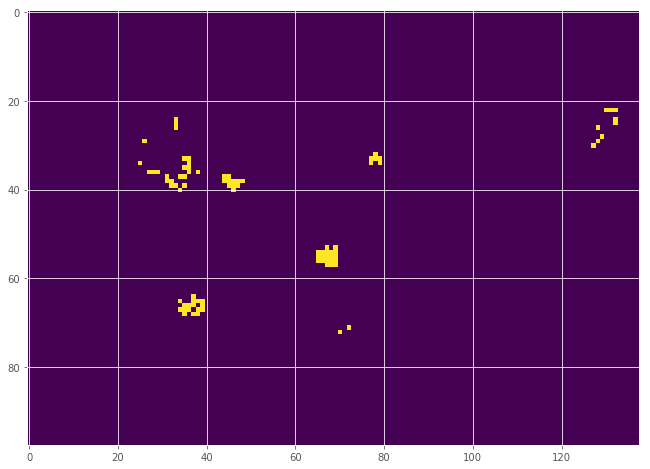

In [218]:
index_pos = np.where(labels_2)[0]
print(index_pos)

plt.imshow(make_image_real_2(labels_2[real_rows_2]))
labels_2.shape
real_rows_2.shape
data_2.shape

In [240]:
all_data = []

auc1s = []
auc2s = []
auc3s = []
auc_data1s = []

xxs = np.linspace(0, 1, 100)
all_tprsSVM = []
all_tprsSGD = []
all_tprsNone = []

#niters = []
# iteration time
total = 2
xs = [x for x in range(1,total+1)]
for x in range(0, total):
        #print(iterations)
    #partialData = get10percentData()
    
    xTrain, xTest, yTrain, yTest, xTrain_SVM, xTest_SVM, yTrain_SVM, yTest_SVM = partial_data2(labels_2, data_2, data_SVM)
    
    roc_auc_SVM, y_score_SVM, y_test_SVM, fpr_SVM, tpr_SVM = data2_SVM(xTrain_SVM, xTest_SVM, yTrain_SVM, yTest_SVM)
    
    roc_auc_SGD, y_score_SGD,roc_auc_N, y_score_N, yTest, fpr_SGD, tpr_SGD,fpr_N,tpr_N,  mean_roc_auc_data1 = nested_cv_using_fresh_cvdata(xTrain, xTest, yTrain, yTest)
    
    auc1s.append(roc_auc_SVM)
    auc2s.append(roc_auc_SGD)
    auc3s.append(roc_auc_N)
    auc_data1s.append(mean_roc_auc_data1)
    
    #fpr_SVM,tpr_SVM,threshold_SVM = roc_curve(y_testSVM[2, :], predictionsSVM[2, :])
    #fpr_SGD,tpr_SGD,threshold_SGD = roc_curve(yTest[2, :], predictionsSGD[2, :])
    #fpr_None,tpr_None,threshold_None = roc_curve(yTest[2, :], predictionsNone[2, :])
    
    new_tprSVM = np.interp(xxs, fpr_SVM, tpr_SVM)
    new_tprSGD = np.interp(xxs, fpr_SGD, tpr_SGD)
    new_tprNone = np.interp(xxs, fpr_N, tpr_N)
    
    all_tprsSVM.append(new_tprSVM)
    all_tprsSGD.append(new_tprSGD)
    all_tprsNone.append(new_tprNone)
    
    #niters.append(niter)

    
    #data_to_plot = [auc1s, auc2s]
    #plt.boxplot(data_to_plot)
    #if y == 0:

all_data = [auc_data1s,auc1s, auc2s,auc3s]

tprsSVM = np.array(all_tprsSVM)
tprsSGD = np.array(all_tprsSGD)
tprsNone = np.array(all_tprsNone)


mean_tprsSVM = tprsSVM.mean(axis=0) # MEAN
mean_tprsSGD = tprsSGD.mean(axis=0)
mean_tprsNone = tprsNone.mean(axis=0)

std_SVM = tprsSVM.std(axis=0) # Standard deviation
std_SGD= tprsSGD.std(axis=0)
std_None = tprsNone.std(axis=0)                     
                      
tprs_upperSVM = np.minimum(mean_tprsSVM + std_SVM, 1) # to draw std
tprs_lowerSVM = mean_tprsSVM - std_SVM

tprs_upperSGD = np.minimum(mean_tprsSGD + std_SGD, 1) # to draw std
tprs_lowerSGD = mean_tprsSGD - std_SGD

tprs_upperNone = np.minimum(mean_tprsNone + std_None, 1) # to draw std
tprs_lowerNone = mean_tprsNone - std_None




(45,)
(44,)
(3500,)
(3280,)
(6869, 500)
(6869, 500)
(3545, 500)
(3324, 500)
(45,)
(44,)
(3500,)
(3280,)
(6869, 500)
(6869, 500)
(3545, 500)
(3324, 500)


In [241]:
np.mean(auc1s)

0.47944151884700664

In [242]:
auc1s

[0.48815825942350333, 0.47072477827050996]

In [243]:
a = np.mean(auc1s)

In [244]:
np.mean(auc2s)

0.5182840216186253

In [245]:
b = np.mean(auc2s)

In [246]:
np.mean(auc3s)

0.50360137195121957

In [247]:
c = np.mean(auc3s)

In [248]:
np.mean(auc_data1s)

0.91176136618010428

# boxplot

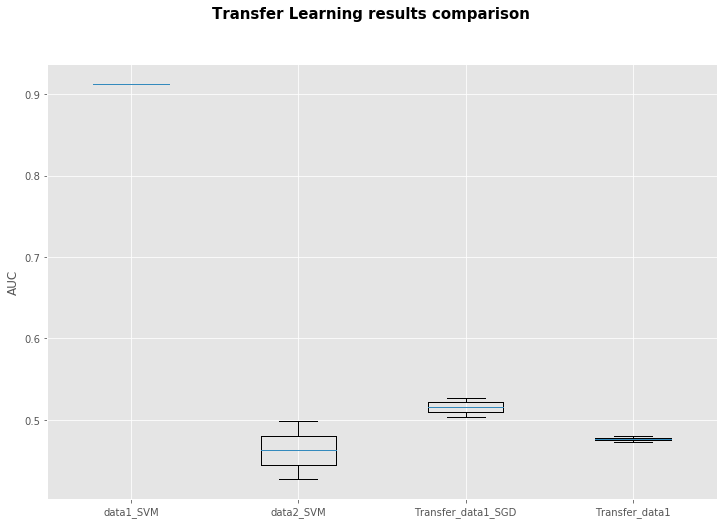

In [193]:
fig = plt.figure()
fig.suptitle('Transfer Learning results comparison', fontsize=15, fontweight='bold')
ax = fig.add_subplot(111)
ax.set_xticklabels(['SVM', 'Transfer_SGD', 'Transfer_SVM'])
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.boxplot(all_data)
plt.boxplot(all_data)
#ax.set_title('axes title')
plt.xticks([1,2,3,4],['data1_SVM','data2_SVM', 'Transfer_data1_SGD', 'Transfer_data1'])
ax.set_ylabel('AUC')
plt.show()

# ROC

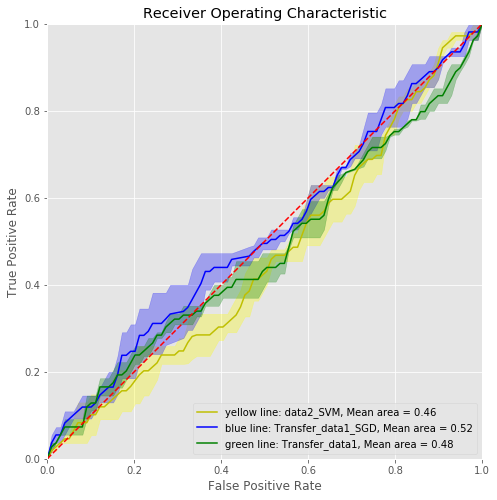

In [194]:
plt.title('Receiver Operating Characteristic')
#plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot(xxs, mean_tprsSVM, 'y',label = 'yellow line: data2_SVM, Mean area = %0.2f' % a)
plt.fill_between(xxs, tprs_lowerSVM, tprs_upperSVM, color='yellow', alpha=0.3) # std area :)
plt.plot(xxs, mean_tprsSGD, 'b',label = 'blue line: Transfer_data1_SGD, Mean area = %0.2f' % b)
plt.fill_between(xxs, tprs_lowerSGD, tprs_upperSGD, color='blue', alpha=0.3) # std area :)
plt.plot(xxs, mean_tprsNone, 'g',label = 'green line: Transfer_data1, Mean area = %0.2f' % c)
plt.fill_between(xxs, tprs_lowerNone, tprs_upperNone, color='green', alpha=0.3) # std area :)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.gca().set_aspect('equal', adjustable='box')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()